In [2]:
from sympy import *
from sympy.matrices import *
init_printing(use_latex=True)

In [3]:
def dh(a,alpha,d,theta):
    """
    Denavit-Hartenberg matrix
    """
    M = Matrix([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

def nr(J,b,x0,eps=0.001):
    while True:
        x = ( J.subs(x0).evalf().inv() )*(-b.subs(x0).evalf() )
        if x.norm() < eps: break
        for k,var in enumerate(x0):
            x0[var] += x[k] 
    return x0

In [40]:
d1,a2,a3 = 100, 200, 200
t1,t2,t3 = symbols("\\theta_1:4")
Px,Py,Pz = 250,100,210
T = simplify( dh(0,pi/2,d1,t1)*dh(a2,0,0,t2)*dh(a3,0,0,t3) )

In [57]:
ec1 = T[0,3] - Px
ec2 = T[1,3] - Py 
ec3 = T[2,3] - Pz

b = Matrix([ec1,ec2,ec3])
J = b.jacobian([t1,t2,t3])

X0 = {t1:pi/6, t2:rad(15), t3:pi/3}

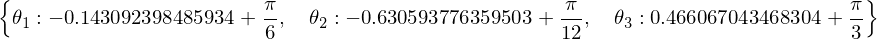

In [58]:
sol = nr(J,b,X0, eps=1e-12)
sol

In [59]:
ec1.subs(sol).evalf(), ec2.subs(sol).evalf(), ec3.subs(sol).evalf()

In [60]:
deg( sol[t1] ).evalf(), deg(sol[t2]).evalf(), deg(sol[t3]).evalf()

In [16]:
d1 = 100
t1,t2,d3 = symbols("\\theta_1, \\theta_2, d_3")
Px,Py,Pz = 250,80,150
T = simplify( dh(0,pi/2,d1,t1)*dh(0,pi/2,0,t2)*dh(0,0,d3,0) )

ec1 = T[0,3] - Px
ec2 = T[1,3] - Py 
ec3 = T[2,3] - Pz

b = Matrix([ec1,ec2,ec3])
J = b.jacobian([t1,t2,d3])

X0 = {t1:pi/9, t2:rad(100), d3:180}

In [17]:
sol = nr(J,b,X0,1e-8)

In [18]:
deg( sol[t1] ).evalf(), deg( sol[t2] ).evalf(), sol[d3].evalf()